In [35]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [36]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [39]:
data = pd.read_csv('/Users/stefanflorin/Desktop/santander-customer-satisfaction/train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [40]:
data.shape

(76020, 371)

In [41]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [42]:
y = data['TARGET']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [44]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

### Remove Constant, Quasi Constant and Duplicate Features

In [45]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [46]:
X_train_T = X_train.T
X_test_T = X_test.T

In [47]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [48]:
X_train_T.shape

(273, 60816)

In [49]:
X_train_T.duplicated().sum()

17

In [50]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254     True
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [51]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [52]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [53]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [57]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [58]:
X_train = X_train.reshape(60816, 256, 1)
X_test = X_test.reshape(15204, 256, 1)

In [59]:
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [60]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Build CNN

In [70]:
model = Sequential()
#32
model.add(Conv1D(4, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

#64
model.add(Conv1D(8, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

#128
model.add(Conv1D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

#256
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 254, 4)            16        
_________________________________________________________________
batch_normalization_9 (Batch (None, 254, 4)            16        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 127, 4)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 127, 4)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 125, 8)            104       
_________________________________________________________________
batch_normalization_10 (Batc (None, 125, 8)            32        
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 62, 8)            

In [72]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 17s 286us/sample - loss: 0.2860 - accuracy: 0.9387 - val_loss: 0.1869 - val_accuracy: 0.9604
Epoch 2/10
60816/60816 [==============================] - 15s 242us/sample - loss: 0.2218 - accuracy: 0.9538 - val_loss: 0.1840 - val_accuracy: 0.9604
Epoch 3/10
60816/60816 [==============================] - 15s 254us/sample - loss: 0.2020 - accuracy: 0.9576 - val_loss: 0.1834 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 15s 246us/sample - loss: 0.1900 - accuracy: 0.9589 - val_loss: 0.1796 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 15s 247us/sample - loss: 0.1820 - accuracy: 0.9599 - val_loss: 0.1772 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 16s 258us/sample - loss: 0.1804 - accuracy: 0.9602 - val_loss: 0.1751 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [====================

In [74]:
history.history

{'loss': [0.2860134573125566,
  0.22180975997814126,
  0.20203314615539486,
  0.19002176905910895,
  0.1820160522723756,
  0.18040482542518957,
  0.1797982449164299,
  0.17477534699403935,
  0.17305920104687542,
  0.17285194845222793],
 'accuracy': [0.9386839,
  0.9537951,
  0.9575934,
  0.95887595,
  0.95986253,
  0.960175,
  0.9602078,
  0.9603229,
  0.96033937,
  0.9603558],
 'val_loss': [0.1868830695062272,
  0.18401040787980355,
  0.1834052358233311,
  0.17962617420250102,
  0.17721339957913548,
  0.17511080756638434,
  0.17458988295197173,
  0.17400780026241058,
  0.17205526685732755,
  0.17144295171401086],
 'val_accuracy': [0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052]}

In [75]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

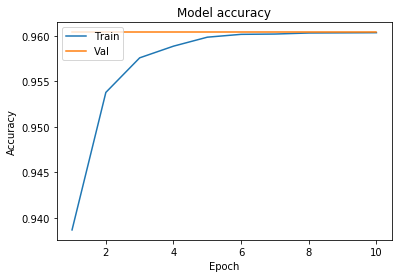

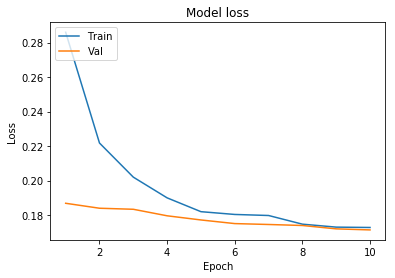

In [76]:
plot_learningCurve(history, 10)